# 목표
- 500 명의 키와 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#데이터 로드
bmi = pd.read_csv('bmi_500.csv')
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [3]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [4]:
# 기술통계 확인
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


# 3. 데이터 전처리

In [5]:
# 이상치, 결측치 확인 후 제거 또는 변경하기

In [6]:
bmi.info()
#결측치 여부 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


# 탐색적 데이터 분석
- 데이터를 자세하게 살펴보자
- 그래프, 통계값 등을 확인해보자

In [7]:
# 비만도 등급 확인 
bmi['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

In [8]:
#Obesity인 사람들의 데이터만 살펴보기
#1. bmi의 Label값 가져오기

# bmi['Label']

#2. Label값 중 Obesity를 boolean 데이터로 찾기

bol = bmi['Label'] == 'Obesity'

#3. boolean데이터로 인덱싱하기

data1=bmi.loc[bol]

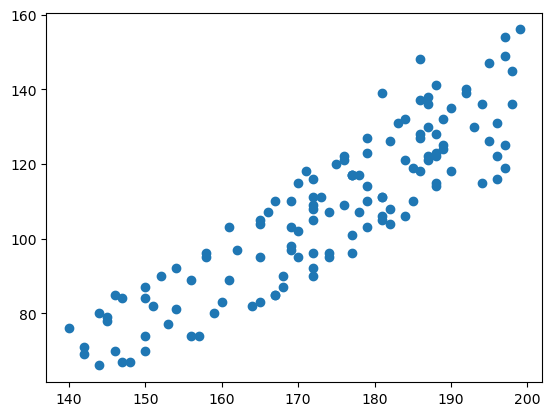

In [9]:
#Scatter차트(산점도) 를 사용해서 그래프로 표현
bol = bmi['Label'] == 'Obesity'
data1=bmi.loc[bol]

import matplotlib.pyplot as plt
plt.scatter(data1['Height'], data1['Weight'])
plt.show()

In [10]:
def my_scatter(label, color):
    bol = bmi['Label'] == label
    data1=bmi.loc[bol]

    import matplotlib.pyplot as plt
    plt.scatter(data1['Height'], data1['Weight'], c = color, label= label)

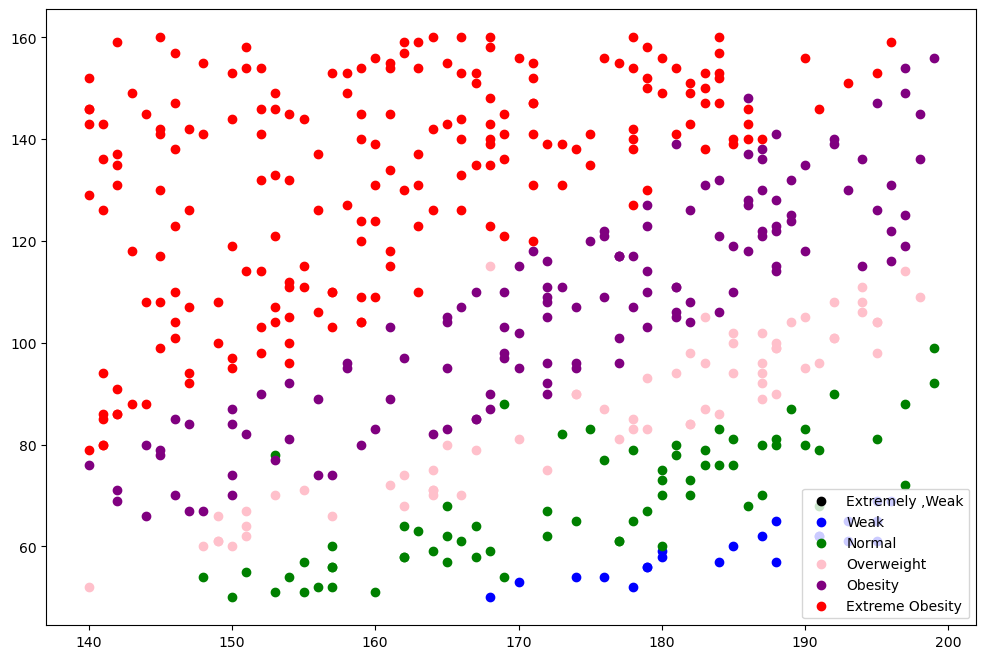

In [11]:
plt.figure(figsize=(12,8))
my_scatter('Extremely ,Weak','black')
my_scatter('Weak','blue')
my_scatter('Normal','green')
my_scatter('Overweight','pink')
my_scatter('Obesity','purple')
my_scatter('Extreme Obesity','red')
plt.legend()
plt.show()

In [12]:
# 키가 158cm에 몸무게가 78kg인 사람의 라벨값(normal > obesity) 변경

bol = bmi['Label'] == 'Normal'
nor = bmi[bol]
bol1 = nor['Height'] == 153
nor[bol1]

,Gender,Height,Weight,Label
70,Female,153,51,Normal
231,Female,153,78,Normal


In [13]:
# 231번 인덱스를 가지고 있는 값의 Label을 변경
bmi.loc[231,'Label'] = 'Obesity'

In [14]:
bol = bmi['Label'] == 'Normal'
nor = bmi[bol]
bol1 = nor['Height'] == 153
nor[bol1]

,Gender,Height,Weight,Label
70,Female,153,51,Normal


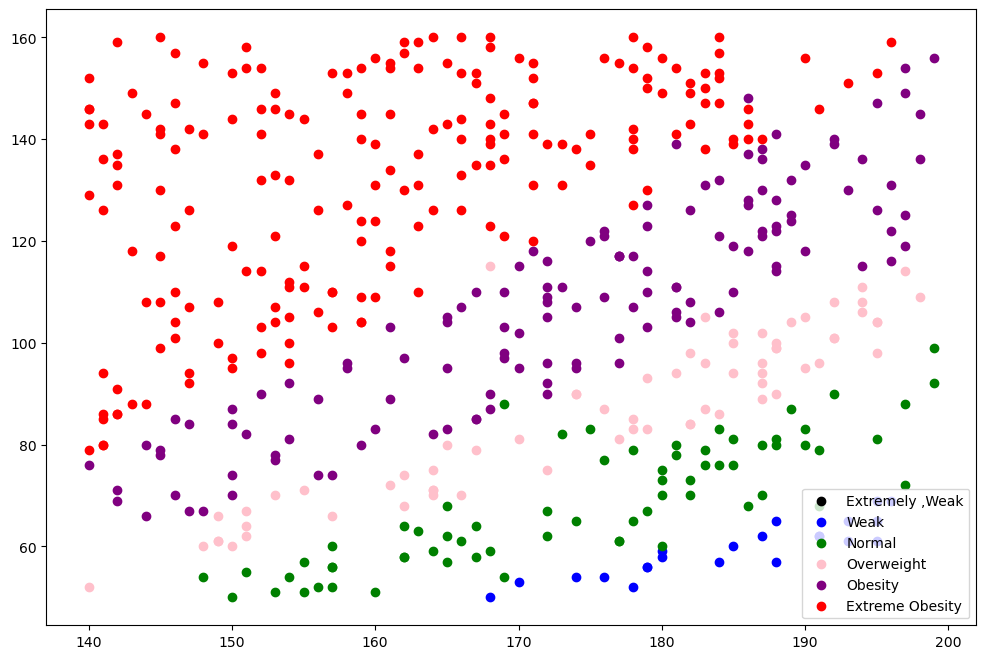

In [15]:
plt.figure(figsize=(12,8))
my_scatter('Extremely ,Weak','black')
my_scatter('Weak','blue')
my_scatter('Normal','green')
my_scatter('Overweight','pink')
my_scatter('Obesity','purple')
my_scatter('Extreme Obesity','red')
plt.legend()
plt.show()

# 5 모델 선택 및 하이퍼 파라미터 튜닝

In [16]:
# 데이터 전처리가 다 된 상태
# 그러므로 데이터 분리

# 데이터 분리
# 1. 문제(X)와 답(y)으로 분리
# 2. 훈련(train)과 평가(test)로 데이터 분리(7:3)

In [17]:
# 1. 문제와 정답으로 분리
# 문제: 키, 몸무게
# 정답: 비만도 라벨

X=bmi.loc[:, 'Height':'Weight']
y=bmi.loc[:, 'Label']

In [18]:
# 2. 훈련(train)과 평가(test)로 데이터 분리(7:3)

X_train = X.iloc[ : 350]
X_test = X.iloc[350 : ]
y_train = y.iloc[ : 350]
y_test = y.iloc[350 :]

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 2), (150, 2), (350,), (150,))

In [20]:
#모델 불러오기

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# 6 학습

In [21]:
# 학습을 통해 데이터를 가장 잘 설명하는 규칙 1개 찾기
# train(훈련) : 학습 시 데이터와 평가 시 데이터를 구분짓기 위함

knn.fit(X_train, y_train)

KNeighborsClassifier()

# 7 평가 및 예측

In [22]:
# 평가

# 모델이 규칙을 얼마나 잘 찾았는가

In [23]:
knn.score(X_test, y_test)

0.9066666666666666

In [24]:
# 트레이닝 데이터가 ﻿더 높게 나옴

# 규칙을 찾을 때 사용하는 데이터기 때문﻿

knn.score(X_train, y_train)

0.9285714285714286

In [25]:
# 예측
# X데이터와 같은 형식

knn.predict([[174,40]])

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Weak'], dtype=object)

In [26]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
random_forest.score(X_test,y_test)

0.8666666666666667

In [27]:
# 성별 컬럼을 학습 데이터에 추가하기
# Male:0, Female:1> Mapping / 라벨 인코딩
bmi['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [28]:
bmi['Gender'] = bmi['Gender'].map({"Male": 0, "Female" : 1})
bmi.head()

,Gender,Height,Weight,Label
0,0,174,96,Obesity
1,0,189,87,Normal
2,1,185,110,Obesity
3,1,195,104,Overweight
4,0,149,61,Overweight


In [29]:
# 데이터 나누기

X=bmi.loc[:, 'Gender':'Weight']
y=bmi.loc[:, 'Label']

In [30]:
X_train = X.iloc[ : 350]
X_test = X.iloc[350 : ]
y_train = y.iloc[ : 350]
y_test = y.iloc[350 :]

In [31]:
# 모델 불러오기
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [32]:
# 학습
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
# 평가
knn.score(X_test, y_test)

0.9066666666666666

In [34]:
X_train.head()

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61


In [35]:
# 예측
knn.predict([[0,149,61]])

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Overweight'], dtype=object)

In [36]:
#일반화
#knn1
#train 점수: 0.9
#test 점수 : 0.9
# 찾은 규칙이 test에도 잘 반영 되어 있음
# 개선 가능성이 낮은 모델 


#과대 적합 / 과소적합
#knn2
#train 점수 : 0.95
#test 점수: 0.85
# 찾은 규칙은 성능이 0.95인데 test에 잘 반영이 안되어 있음
# test 점수가 더 낮기 때문에 안좋은 모델 -> 모델 변경
# 개선 가능성이 높은 모델